In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [3]:
plt.rcParams['figure.figsize'] = [12, 8]


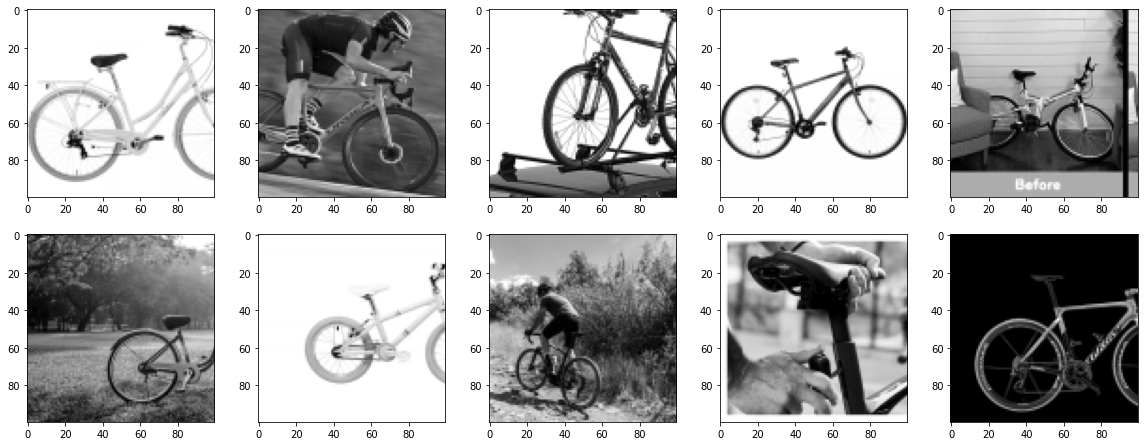

In [5]:
from helper import get_formatted_images, get_labels


path = 'G:\\My Drive\\School\\6. Spring 2022\\EE379K - COMPUTER VISION\\CAPTCHA Solver\\archive\\Recaptcha Dataset\\Bicycle'

num_imgs = 10
plt.figure(figsize=(20, 20))

# bicycle:
images = get_formatted_images(path, cnt=num_imgs)
labels = get_labels(images, 'bicycle')

for i, img in enumerate(images):
    dim = (100, 100)
    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    plt.subplot(5, 5, i+1)
    plt.imshow(resized, cmap="gray")
    


In [31]:
batch_size = 32
img_height = 100
img_width = 100

data_dir = 'G:\\My Drive\\School\\6. Spring 2022\\EE379K - COMPUTER VISION\\CAPTCHA Solver\\archive\\Recaptcha Dataset'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 23169 files belonging to 5 classes.
Using 18536 files for training.
<BatchDataset shapes: ((None, 100, 100, 3), (None,)), types: (tf.float32, tf.int32)>
Found 23169 files belonging to 5 classes.
Using 4633 files for validation.


In [29]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [30]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
 47/580 [=>............................] - ETA: 2:15 - loss: 1.2294 - accuracy: 0.4947

InvalidArgumentError:  Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_1961]

Function call stack:
train_function
